In [1]:
# If running on Google Colab, you need to install conda environment so setting up required dependencies
!pip install -q condacolab
import condacolab
condacolab.install()
# runtime would restart after the execution of the above block

⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.11.0-0/Mambaforge-23.11.0-0-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:09
🔁 Restarting kernel...


In [13]:
# Mounting Google Drive
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/in-context-learning-trees/src
%load_ext autoreload
%autoreload 2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/in-context-learning-trees/src


In [8]:
## Creating custom environment - uncomment and run for the first time if running in colab
# !conda env create -f environment.yml


In [18]:
# run the below in the terminal (Google Colab Pro required)
%%shell
eval "$(conda shell.bash hook)" # copy conda command to shell
conda activate in-context-learning
python --version
python /content/drive/MyDrive/in-context-learning-trees/src/eval_colab.py
# conda deactivatev

Python 3.8.12
  0% 0/3 [00:00<?, ?it/s]standard

  0% 0/7 [00:00<?, ?it/s]
 14% 1/7 [00:01<00:11,  1.93s/it]
 29% 2/7 [00:05<00:14,  2.91s/it]
 43% 3/7 [00:09<00:13,  3.35s/it]
 57% 4/7 [01:23<01:33, 31.13s/it]
 71% 5/7 [02:51<01:43, 51.68s/it]
 86% 6/7 [54:02<17:58, 1078.39s/it]
100% 7/7 [54:03<00:00, 463.31s/it]
 33% 1/3 [54:03<1:48:06, 3243.15s/it]random_quadrants

  0% 0/7 [00:00<?, ?it/s]
 14% 1/7 [01:12<07:15, 72.51s/it]
 29% 2/7 [01:35<03:35, 43.16s/it]
 43% 3/7 [01:57<02:15, 33.88s/it]
 57% 4/7 [02:53<02:07, 42.46s/it]
 71% 5/7 [03:50<01:35, 47.58s/it]
 86% 6/7 [41:18<13:15, 795.75s/it]
100% 7/7 [41:37<00:00, 356.81s/it]
 67% 2/3 [1:35:40<46:44, 2804.64s/it]overlapping_train_test

  0% 0/7 [00:00<?, ?it/s]
 14% 1/7 [01:13<07:19, 73.24s/it]
 29% 2/7 [01:36<03:39, 43.96s/it]
 43% 3/7 [02:00<02:18, 34.64s/it]
 57% 4/7 [03:34<02:54, 58.20s/it]
 71% 5/7 [05:23<02:32, 76.46s/it]
 86% 6/7 [56:43<18:17, 1097.77s/it]
100% 7/7 [57:03<00:00, 489.12s/it]
100% 3/3 [2:32:44<00:00, 3054.88s/i

In [4]:
#!python gdrive/My\ Drive/Colab\ Notebooks/object_detection_demo-master/test.py
!python /content/drive/MyDrive/in-context-learning-trees/src/eval_colab.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/in-context-learning-trees/src/eval_colab.py", line 7, in <module>
    import matplotlib.pyplot as plt
ModuleNotFoundError: No module named 'matplotlib'


In [1]:
from collections import OrderedDict
import re
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from tqdm.notebook import tqdm

from eval import get_run_metrics, read_run_dir, get_model_from_run
from plot_utils import basic_plot, collect_results, relevant_model_names

%matplotlib inline
%load_ext autoreload
%autoreload 2

sns.set_theme('notebook', 'darkgrid')
palette = sns.color_palette('colorblind')

run_dir = "../models"

In [2]:
df = read_run_dir(run_dir)
df  # list all the runs in our run_dir

,run_id,task,model,kwargs,num_tasks,num_examples,n_dims,n_layer,n_head,run_name
1,pretrained,decision_tree,Transformer,depth=4,-1,-1,20,12,8,decision_tree_pretrained
3,pretrained,linear_regression,Transformer,,-1,-1,20,12,8,linear_regression_pretrained
0,pretrained,relu_2nn_regression,Transformer,hidden_layer_size=100,-1,-1,20,12,8,relu_2nn_regression_pretrained
2,pretrained,sparse_linear_regression,Transformer,sparsity=3,-1,-1,20,12,8,sparse_regression_pretrained


In [3]:
#task = "linear_regression"
#task = "sparse_linear_regression"
task = "decision_tree"
#task = "relu_2nn_regression"

run_id = "pretrained"  # if you train more models, replace with the run_id from the table above

run_path = os.path.join(run_dir, task, run_id)
recompute_metrics = False

if recompute_metrics:
    get_run_metrics(run_path)  # these are normally precomputed at the end of training

# Plot pre-computed metrics

decision_tree_pretrained pretrained


  0%|          | 0/3 [00:00<?, ?it/s]

standard


0it [00:00, ?it/s]


random_quadrants


0it [00:00, ?it/s]


overlapping_train_test


0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 411.00it/s]


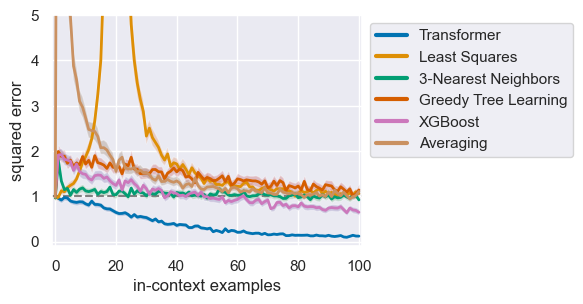

In [17]:
def valid_row(r):
    return r.task == task and r.run_id == run_id


run_dir
metrics = collect_results(run_dir, df, valid_row=valid_row)
_, conf = get_model_from_run(run_path, only_conf=True)
n_dims = conf.model.n_dims


models = relevant_model_names[task]
basic_plot(metrics["standard"], models=models)
plt.show()


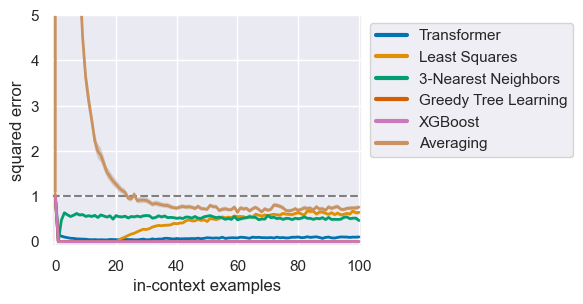

In [18]:
basic_plot(metrics["overlapping_train_test"], models=models)
plt.show()


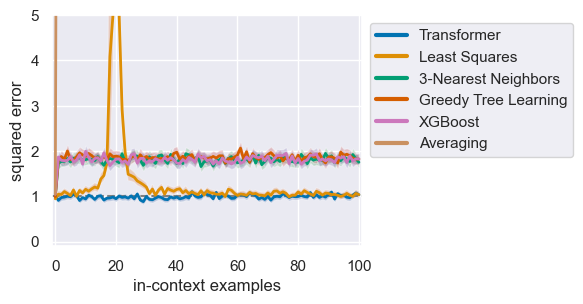

In [20]:
basic_plot(metrics["random_quadrants"], models=models)
plt.show()


In [6]:
# plot any OOD metrics
for name, metric in metrics.items():
    if name == "standard": continue

    if "scale" in name:
        scale = float(name.split("=")[-1])**2
    else:
        scale = 1.0

    trivial = 1.0 if "noisy" not in name else (1+1/n_dims)
    fig, ax = basic_plot(metric, models=models, trivial=trivial * scale)
    ax.set_title(name)

    if "ortho" in name:
        ax.set_xlim(-1, n_dims - 1)
    ax.set_ylim(-.1 * scale, 1.5 * scale)

    plt.show()

NameError: name 'metrics' is not defined

# Interactive setup

We will now directly load the model and measure its in-context learning ability on a batch of random inputs. (In the paper we average over multiple such batches to obtain better estimates.)

In [ ]:
from samplers import get_data_sampler
from tasks import get_task_sampler

In [ ]:
model, conf = get_model_from_run(run_path)

n_dims = conf.model.n_dims
batch_size = conf.training.batch_size

data_sampler = get_data_sampler(conf.training.data, n_dims)
task_sampler = get_task_sampler(
    conf.training.task,
    n_dims,
    batch_size,
    **conf.training.task_kwargs
)

In [ ]:
task = task_sampler()
xs = data_sampler.sample_xs(b_size=batch_size, n_points=conf.training.curriculum.points.end)
ys = task.evaluate(xs)

In [ ]:
with torch.no_grad():
    pred = model(xs, ys)

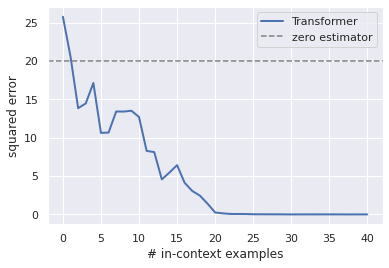

In [ ]:
metric = task.get_metric()
loss = metric(pred, ys).numpy()

sparsity = conf.training.task_kwargs.sparsity if "sparsity" in conf.training.task_kwargs else None
baseline = {
    "linear_regression": n_dims,
    "sparse_linear_regression": sparsity,
    "relu_2nn_regression": n_dims,
    "decision_tree": 1,
}[conf.training.task]

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

As an exploration example, let's see how robust the model is to doubling all the inputs.

In [ ]:
xs2 = 2 * xs
ys2 = task.evaluate(xs2)
with torch.no_grad():
    pred2 = model(xs2, ys2)

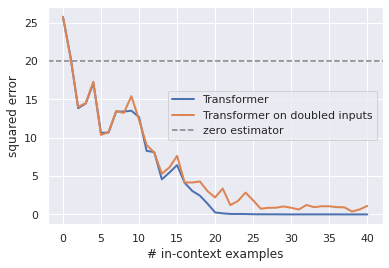

In [ ]:
loss2 = metric(pred2, ys2).numpy()

plt.plot(loss.mean(axis=0), lw=2, label="Transformer")
plt.plot(loss2.mean(axis=0) / 4, lw=2, label="Transformer on doubled inputs")
plt.axhline(baseline, ls="--", color="gray", label="zero estimator")
plt.xlabel("# in-context examples")
plt.ylabel("squared error")
plt.legend()
plt.show()

The error does increase, especially when the number of in-context examples exceeds the dimension, but the model is still relatively accurate.